In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

from qiskit import *
from qiskit.circuit import *
from qiskit.circuit.library import *
from qiskit.quantum_info import *
from qiskit_algorithms import * 

In [6]:
num_qubits = 5

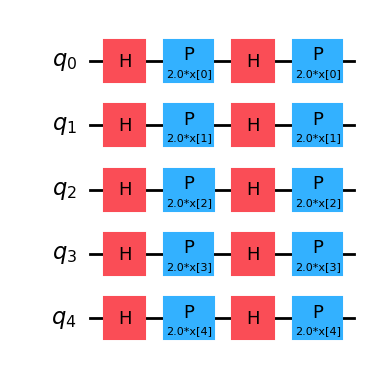

In [13]:
feature_map = ZFeatureMap(feature_dimension=num_qubits,reps=2,name="ZFeatureMap")
feature_map.decompose().draw('mpl')

In [14]:
class AnsatzLibrary:
    def __init__(self):
        self.ansatz_map = {
            "ansatz1": self.ansatz1,
            "ansatz2": self.ansatz2,
            
        }

    def ansatz1(self, params, num_qubits):
        # qc = QuantumCircuit(num_qubits)
        qc = RealAmplitudes(num_qubits)
        return qc

        pass

    def ansatz2(self, params, num_qubits):
        # qc = QuantumCircuit(num_qubits)
        qc = EfficientSU2(num_qubits)
        return qc
        pass



In [18]:
ansatz_lib = AnsatzLibrary()
ansatz_circuit = ansatz_lib.ansatz_map["ansatz2"](None, num_qubits)


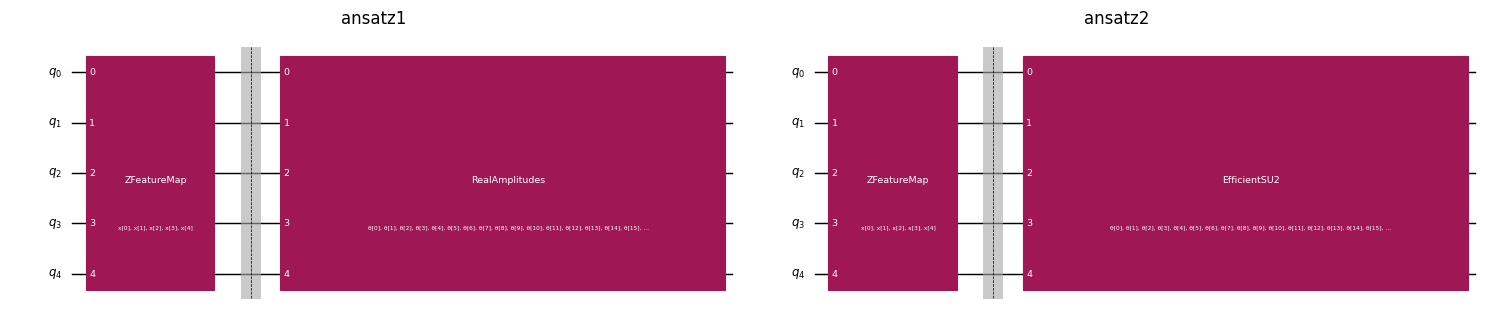

In [21]:
fig, axs = plt.subplots(1, len(ansatz_lib.ansatz_map), figsize=(15, 5))

for idx, (name, ansatz_fn) in enumerate(ansatz_lib.ansatz_map.items()):
    ansatz_circuit = ansatz_fn(None, num_qubits)
    full_circuit = QuantumCircuit(num_qubits)
    full_circuit.compose(feature_map, inplace=True)
    full_circuit.barrier()
    full_circuit.compose(ansatz_circuit, inplace=True)
    
    full_circuit.draw(output="mpl", ax=axs[idx], fold=-1)
    axs[idx].set_title(name)

plt.tight_layout()
plt.show()

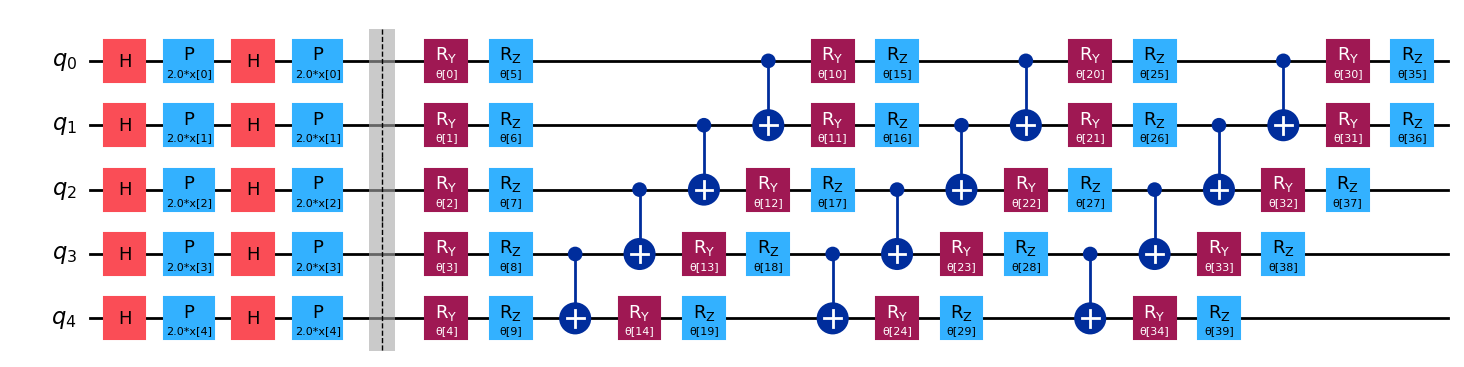

In [19]:
full_circuit = QuantumCircuit(num_qubits)
full_circuit.compose(feature_map, inplace=True)
full_circuit.barrier()
full_circuit.compose(ansatz_circuit, inplace=True)

full_circuit.decompose().draw("mpl")

In [27]:
pi = np.pi/2

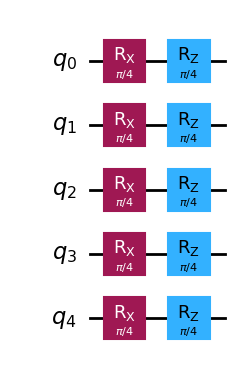

In [ ]:
circui1 = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    circui1.rx(pi/2,i)
    circui1.rz(pi/2,i)
circui1.draw('mpl')
#circui1.depth() 

In [89]:
circui1.depth() 

2

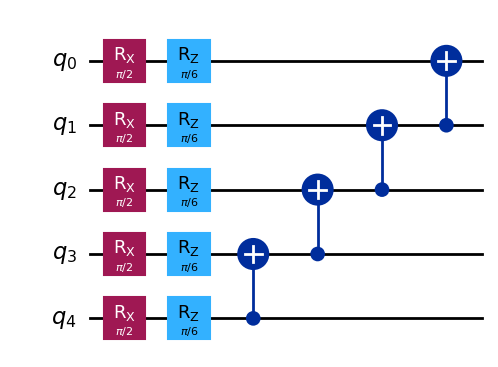

In [87]:
circuit2 = QuantumCircuit(num_qubits)


for i in range(num_qubits):
    circuit2.rx(pi, i)
    circuit2.rz(pi/3,i)

for i in range(num_qubits,1,-1):
    circuit2.cx(i-1,i-2)

  
circuit2.draw('mpl')

In [88]:
circuit2.depth()

6

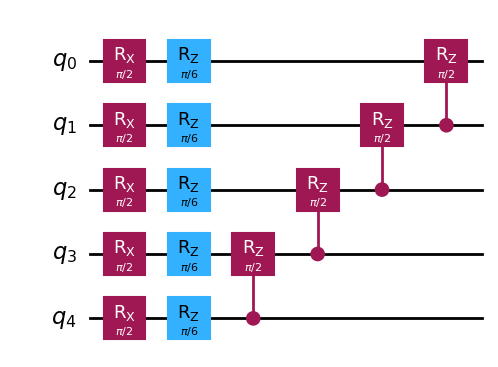

In [63]:
circuit3 = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    circuit3.rx(pi, i)
    circuit3.rz(pi/3,i)

for i in range(num_qubits,1,-1):
    circuit3.crz(pi,i-1,i-2)

    
circuit3.draw('mpl')

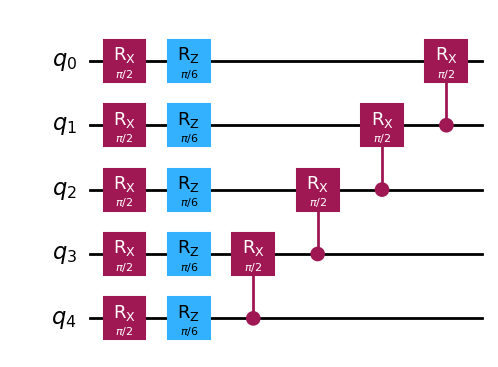

In [64]:
circuit4 = QuantumCircuit(num_qubits)

for i in range(num_qubits):
    circuit4.rx(pi, i)
    circuit4.rz(pi/3,i)

for i in range(num_qubits,1,-1):
    circuit4.crx(pi,i-1,i-2)

    
circuit4.draw('mpl')